In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/realistic_ai_task_data.csv")


In [181]:
df.head()

,task_id,task_title,required_skills,assigned_to,completed,days_taken,deadline_days,task_complexity,user_skills,user_rating,was_late
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,Haematologist,"ML,AWS",U0436,Yes,11,6,high,"SQL,Python",NaN,1
1,bc8960a9-23b8-41e9-b924-56de3eb13b90,"Civil engineer, consulting","Node.js,AWS",U0363,Yes,20,16,low,"DL,React",4.19,1
2,8b9d2434-e465-4150-bd9c-66b3ad3c2d6d,Chartered loss adjuster,SQL,U0352,No,11,14,medium,"React,AWS,C++,SQL",3.66,0
3,07a0ca6e-0822-48f3-ac03-1199972a8469,Chief Financial Officer,"DL,Docker",U0056,Yes,19,14,low,"Node.js,Java,SQL",4.75,1
4,9a1de644-815e-46d1-bb8f-aa1837f8a88b,Aid worker,"Python,React,SQL",U0260,No,12,15,medium,NaN,3.52,1


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   task_id          100000 non-null  object 
 1   task_title       100000 non-null  object 
 2   required_skills  95055 non-null   object 
 3   assigned_to      100000 non-null  object 
 4   completed        100000 non-null  object 
 5   days_taken       100000 non-null  int64  
 6   deadline_days    100000 non-null  int64  
 7   task_complexity  100000 non-null  object 
 8   user_skills      94998 non-null   object 
 9   user_rating      97015 non-null   float64
 10  was_late         100000 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 8.4+ MB


In [183]:
df.describe(include='all')

,task_id,task_title,required_skills,assigned_to,completed,days_taken,deadline_days,task_complexity,user_skills,user_rating,was_late
count,100000,100000,95055,100000,100000,100000.000000,100000.000000,100000,94998,97015.000000,100000.000000
unique,100000,639,820,500,2,NaN,NaN,3,5817,NaN,NaN
top,5bf87db5-4eaa-47dd-bfce-aba0cfb5fc35,Diplomatic Services operational officer,Node.js,U0419,Yes,NaN,NaN,high,Node.js,NaN,NaN
freq,1,189,3290,242,50302,NaN,NaN,33432,2441,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,12.127800,11.036110,NaN,NaN,3.798296,0.554760
std,NaN,NaN,NaN,NaN,NaN,6.376238,5.473113,NaN,NaN,0.588733,0.496995
min,NaN,NaN,NaN,NaN,NaN,-3.000000,2.000000,NaN,NaN,1.120000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000,NaN,NaN,3.400000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,12.000000,11.000000,NaN,NaN,3.800000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,17.000000,16.000000,NaN,NaN,4.210000,1.000000


In [184]:
df.isnull().sum()

,0
task_id,0
task_title,0
required_skills,4945
assigned_to,0
completed,0
days_taken,0
deadline_days,0
task_complexity,0
user_skills,5002
user_rating,2985


In [185]:
print("Completion Distribution:")
print(df['completed'].value_counts())


Completion Distribution:
completed
Yes    50302
No     49698
Name: count, dtype: int64


In [186]:
print("\nWas Task Late?")
print(df['was_late'].value_counts())


Was Task Late?
was_late
1    55476
0    44524
Name: count, dtype: int64


In [187]:
print("\nUser Ratings Distribution (binned):")
print(pd.cut(df['user_rating'], bins=10).value_counts())



User Ratings Distribution (binned):
user_rating
(3.448, 3.836]    23910
(3.836, 4.224]    22994
(3.06, 3.448]     16171
(4.224, 4.612]    14811
(4.612, 5.0]       8596
(2.672, 3.06]      7565
(2.284, 2.672]     2426
(1.896, 2.284]      465
(1.508, 1.896]       71
(1.116, 1.508]        6
Name: count, dtype: int64


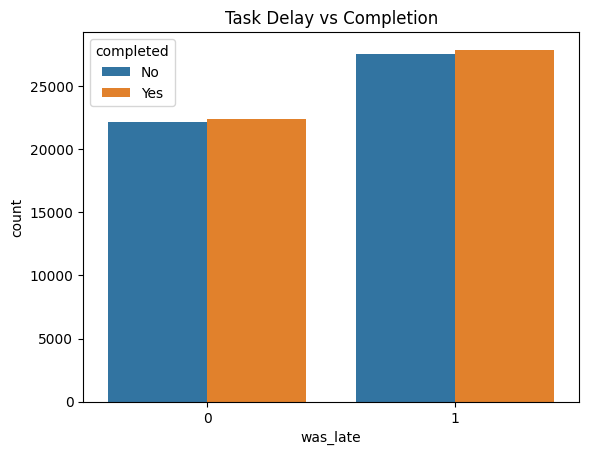

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='was_late', hue='completed')
plt.title("Task Delay vs Completion")
plt.show()

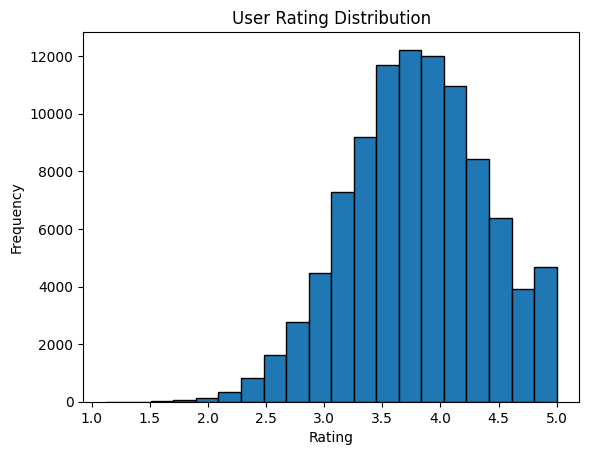

In [189]:
df['user_rating'].hist(bins=20, grid=False, edgecolor='black')
plt.title("User Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [190]:
df.dropna(subset=['was_late'], inplace=True)
print(df.isnull().sum())

task_id               0
task_title            0
required_skills    4945
assigned_to           0
completed             0
days_taken            0
deadline_days         0
task_complexity       0
user_skills        5002
user_rating        2985
was_late              0
dtype: int64


In [191]:

df['required_skills'] = df['required_skills'].fillna('')
df['user_skills'] = df['user_skills'].fillna('')
print(df.isnull().sum())

task_id               0
task_title            0
required_skills       0
assigned_to           0
completed             0
days_taken            0
deadline_days         0
task_complexity       0
user_skills           0
user_rating        2985
was_late              0
dtype: int64


In [192]:
df['user_rating'] = df['user_rating'].fillna(df['user_rating'].mean())
print(df.isnull().sum())

task_id            0
task_title         0
required_skills    0
assigned_to        0
completed          0
days_taken         0
deadline_days      0
task_complexity    0
user_skills        0
user_rating        0
was_late           0
dtype: int64


In [193]:
df['completed'] = df['completed'].map({'Yes': 1, 'No': 0})

In [194]:
# Helper: convert skill strings to sets
df['required_skills'] = df['required_skills'].apply(lambda x: set(x.split(',')))
df['user_skills'] = df['user_skills'].apply(lambda x: set(x.split(',')))

In [195]:
def skill_match(row):
    return len(row['required_skills'].intersection(row['user_skills']))

df['skill_match_count'] = df.apply(skill_match, axis=1)

In [196]:
df_model = df.drop(columns=['task_id', 'task_title', 'required_skills', 'user_skills', 'assigned_to'])

In [197]:
# One-hot encode 'task_complexity' and force 0/1 output
df_model = pd.get_dummies(df_model, columns=['task_complexity'], prefix='complexity')

# Convert boolean columns to integers (0/1)
complexity_cols = [col for col in df_model.columns if col.startswith('complexity_')]
df_model[complexity_cols] = df_model[complexity_cols].astype(int)


In [198]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_model[['days_taken', 'deadline_days', 'user_rating', 'skill_match_count']] = scaler.fit_transform(
    df_model[['days_taken', 'deadline_days', 'user_rating', 'skill_match_count']])


In [199]:
df_model.head(5)

,completed,days_taken,deadline_days,user_rating,was_late,skill_match_count,complexity_high,complexity_low,complexity_medium
0,1,-0.176876,-0.920159,0.000000,1,-0.736954,1,0,0
1,1,1.234621,0.906964,0.675496,1,-0.736954,0,1,0
2,0,-0.176876,0.541539,-0.238492,0,0.877226,0,0,1
3,1,1.077788,0.541539,1.641219,1,-0.736954,0,1,0
4,0,-0.020043,0.724251,-0.479923,1,-0.736954,0,0,1


In [200]:
X = df_model.drop('was_late', axis=1)
y = df_model['was_late']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [201]:
X_train,y_train

(       completed  days_taken  deadline_days  user_rating  skill_match_count  \
 75156          1   -0.333709       0.176115    -0.393698           0.877226   
 2441           1    0.764122       0.176115    -0.876559          -0.736954   
 40227          1    0.136790       0.176115    -0.635129           0.877226   
 68957          1    0.920955       1.272388     0.261614           0.877226   
 48332          0    0.764122       0.176115     0.485800          -0.736954   
 ...          ...         ...            ...          ...                ...   
 43961          0    1.391454       1.272388    -0.635129          -0.736954   
 71395          1    0.607289       0.541539    -1.376666          -0.736954   
 95787          1    0.607289       0.724251    -0.566148          -0.736954   
 17574          0   -0.804209      -1.468296    -1.238705          -0.736954   
 21887          0   -0.490542      -1.102871    -0.255737          -0.736954   
 
        complexity_high  complexity_lo

In [202]:
X_test,y_test

(       completed  days_taken  deadline_days  user_rating  skill_match_count  \
 90638          0    1.391454       0.358827     0.140899          -0.736954   
 7634           1    0.136790      -0.006598     1.037642          -0.736954   
 42673          0    0.136790       0.358827    -0.290227           2.491406   
 6479           1    0.450456       1.455101     1.072132           0.877226   
 6439           0   -0.647376      -1.102871     0.865191           0.877226   
 ...          ...         ...            ...          ...                ...   
 15005          1   -0.647376      -0.006598    -0.272982           0.877226   
 37406          1   -0.961042      -1.102871     0.830701          -0.736954   
 31368          1   -0.176876       0.541539     1.072132           2.491406   
 45003          1    1.234621       0.724251     0.261614          -0.736954   
 47529          1    0.920955       1.272388    -0.635129           0.877226   
 
        complexity_high  complexity_lo

In [203]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [204]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "model": model,
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_prob),
        "conf_matrix": confusion_matrix(y_test, y_pred),
        "report": classification_report(y_test, y_pred, output_dict=True),
        "fpr": roc_curve(y_test, y_prob)[0],
        "tpr": roc_curve(y_test, y_prob)[1]
    }

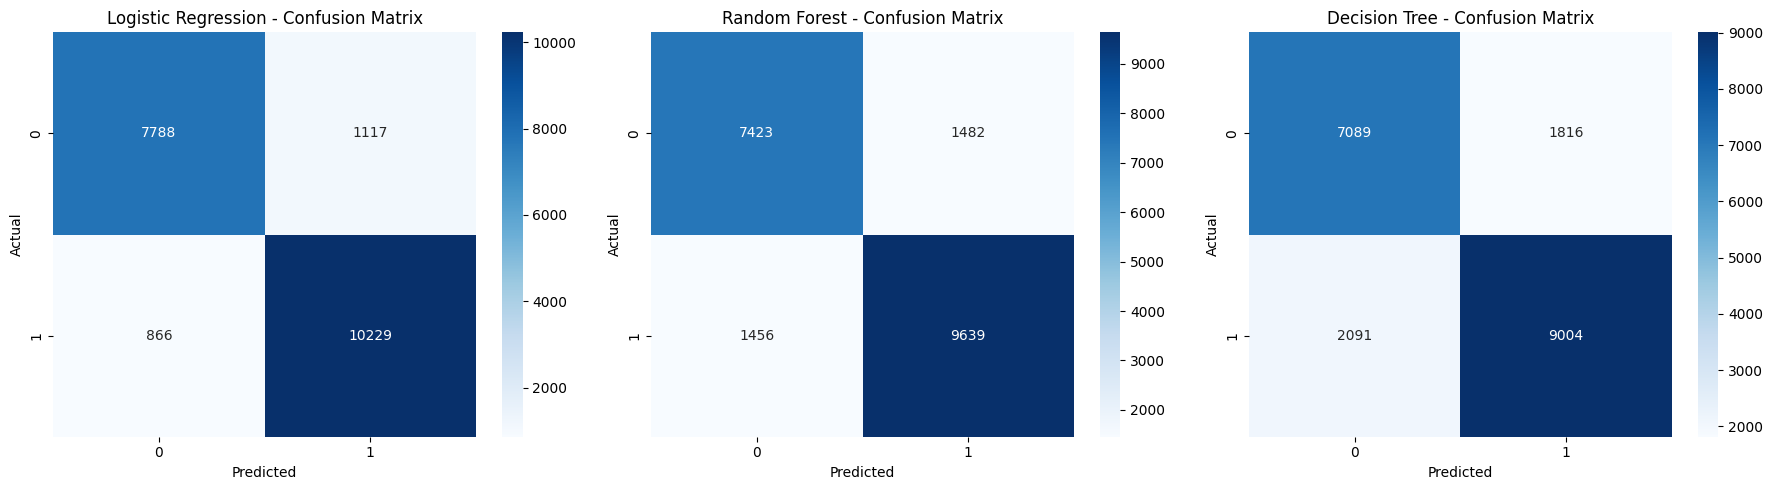

In [205]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for idx, (name, res) in enumerate(results.items()):
    sns.heatmap(res["conf_matrix"], annot=True, fmt='d', ax=axs[idx], cmap='Blues')
    axs[idx].set_title(f"{name} - Confusion Matrix")
    axs[idx].set_xlabel('Predicted')
    axs[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()


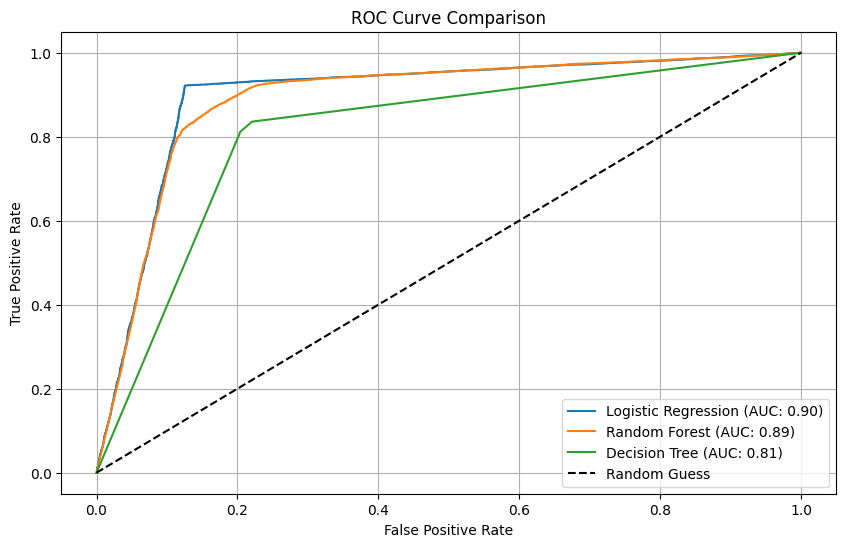

In [206]:
plt.figure(figsize=(10, 6))
for name, res in results.items():
    plt.plot(res["fpr"], res["tpr"], label=f"{name} (AUC: {res['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [207]:
# Create summary comparison table
comparison_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [results[m]['accuracy'] for m in results],
    "ROC AUC": [results[m]['roc_auc'] for m in results]
})

comparison_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)


,Model,Accuracy,ROC AUC
0,Logistic Regression,0.90085,0.897682
1,Random Forest,0.85310,0.890672
2,Decision Tree,0.80465,0.811840
